In [ ]:
import pandas as pd

# Load the two CSV files into DataFrames
legitimate_data = pd.read_csv('structured_data_legitimate.csv')
phishy_data = pd.read_csv('structured_data_phishing.csv')

# Concatenate the DataFrames
combined_data = pd.concat([legitimate_data, phishy_data], ignore_index=True)

# Shuffle the combined DataFrame
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled DataFrame to a new CSV file
combined_data.to_csv('combined_data_randomized.csv', index=False)

print("CSV files combined and shuffled successfully into 'combined_data_randomized.csv'")


CSV files combined and shuffled successfully into 'combined_data_randomized.csv'


In [ ]:
combined_data.head(10)

,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,...,has_text_input,number_of_meta,has_nav,has_object,has_picture,number_of_sources,number_of_span,number_of_table,URL,label
0,1,1,0,0,1,1,0,0,0,0,...,1,10,0,0,0,0,1,0,http://dng65.com,0
1,1,1,1,0,0,1,0,0,1,0,...,1,25,1,0,0,2,24,0,http://mediaroom.com,0
2,1,1,1,0,0,1,0,1,1,0,...,1,11,1,0,0,0,8,0,http://yieldlift.com,0
3,1,0,0,0,0,1,0,0,0,0,...,0,20,0,0,0,0,8,0,http://yowindow.com,0
4,1,1,1,0,0,1,0,0,1,0,...,1,15,1,0,0,0,38,0,http://brighthorizons.com,0
5,1,0,1,0,0,1,0,0,0,0,...,0,3,1,0,0,0,1,0,http://concert.io,0
6,1,1,1,0,0,1,0,0,1,0,...,1,37,0,0,1,46,26,0,http://manilatimes.net,0
7,1,0,0,0,0,1,0,0,0,0,...,0,23,1,0,0,0,85,0,http://thewire.in,0
8,1,1,1,0,0,1,0,1,1,0,...,1,26,1,0,1,22,48,0,http://conta.cc,0
9,1,1,1,0,0,1,0,0,1,0,...,1,7,0,0,0,0,29,1,http://getchu.com,0


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Separate features and target
X = combined_data.drop(columns=['URL', 'label'])
y = combined_data['label']

# Train-test split (if not using K-Fold)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import numpy as np

# Initialize models
# Initialize models with adjusted AdaBoost parameter
models = {
    "Support Vector Machine": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME")  # Set algorithm to SAMME
}


# Store results for each model
results = {}

# Loop through each model, perform K-Fold CV, and compute metrics
for name, model in models.items():
    # K-Fold Cross Validation
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)  # Train the model on the training set

    # Test on the test set (for performance evaluation)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        "CV Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": conf_matrix
    }



Model: Support Vector Machine
CV Accuracy: 0.90
Test Accuracy: 0.90
Precision: 0.81
Recall: 0.98
Confusion Matrix:
[[2799  466]
 [  42 2010]]

Model: Gaussian Naive Bayes
CV Accuracy: 0.90
Test Accuracy: 0.90
Precision: 0.81
Recall: 0.98
Confusion Matrix:
[[2791  474]
 [  40 2012]]

Model: Decision Tree
CV Accuracy: 0.98
Test Accuracy: 0.98
Precision: 0.96
Recall: 0.98
Confusion Matrix:
[[3189   76]
 [  37 2015]]

Model: Random Forest
CV Accuracy: 0.99
Test Accuracy: 0.99
Precision: 0.99
Recall: 0.98
Confusion Matrix:
[[3237   28]
 [  47 2005]]

Model: AdaBoost
CV Accuracy: 0.97
Test Accuracy: 0.97
Precision: 0.98
Recall: 0.94
Confusion Matrix:
[[3226   39]
 [ 116 1936]]


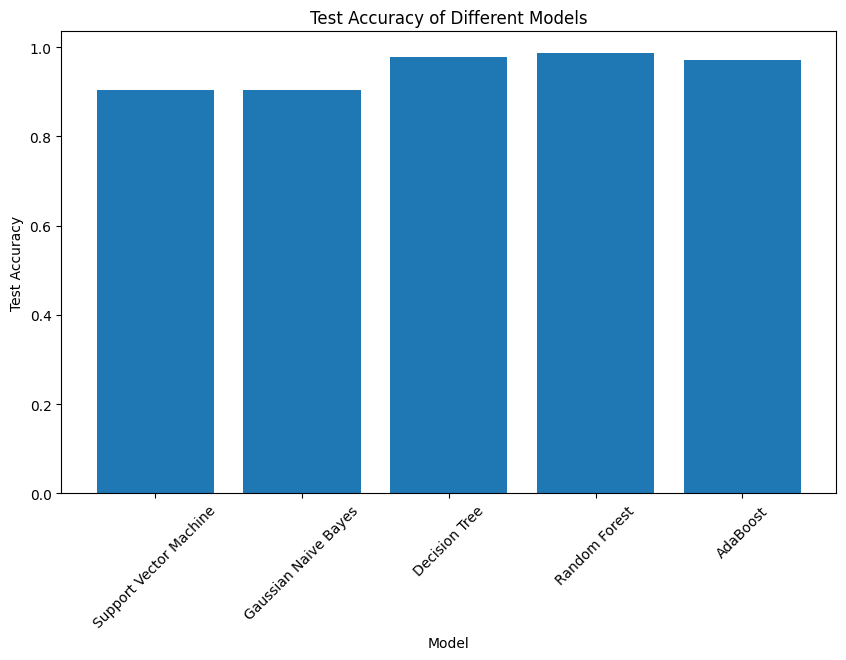

In [ ]:
import matplotlib.pyplot as plt

# Display results for each model
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"CV Accuracy: {metrics['CV Accuracy']:.2f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")

# Visualize the test accuracy of each model
model_names = list(results.keys())
test_accuracies = [results[model]['Test Accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9848597483277658


In [ ]:
import json

# Save the best hyperparameters to a JSON file
best_hyperparameters = grid_search.best_params_

with open("best_hyperparameters.json", "w") as file:
    json.dump(best_hyperparameters, file)

print("Best hyperparameters saved to 'best_hyperparameters.json'")


Best hyperparameters saved to 'best_hyperparameters.json'


In [ ]:
with open("best_hyperparameters.json", "r") as file:
    loaded_hyperparameters = json.load(file)

print("Loaded Hyperparameters:", loaded_hyperparameters)


In [ ]:
# Initialize the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model on the training data
final_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Test Accuracy: 0.9853300733496333
Precision: 0.9842983316977428
Recall: 0.9775828460038987
Confusion Matrix:
 [[3233   32]
 [  46 2006]]


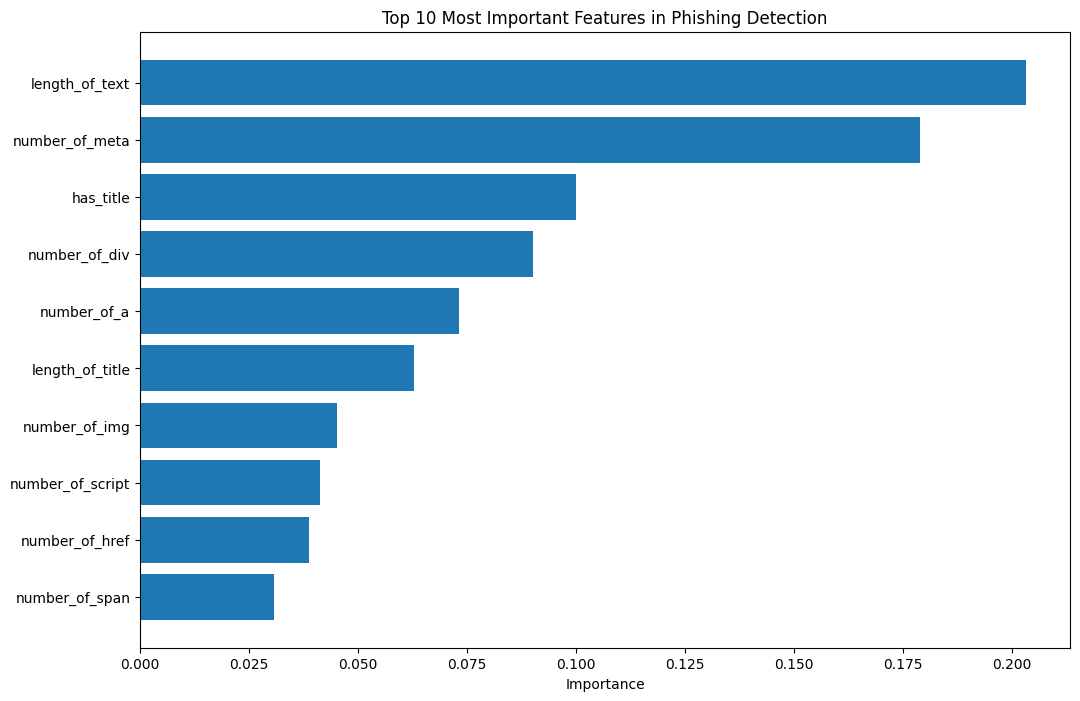

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = final_rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = feature_importances[indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:10], sorted_importances[:10])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features in Phishing Detection')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(final_rf_model, "phishing_detection_model.joblib")
print("Model saved as 'phishing_detection_model.joblib'")


Model saved as 'phishing_detection_model.joblib'


MODEL


In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load("phishing_detection_model.joblib")


In [ ]:
import joblib
import pandas as pd
import json

# Step 1: Load the trained model
model = joblib.load("phishing_detection_model.joblib")

# Step 2: Load best hyperparameters if needed
with open("best_hyperparameters.json", "r") as file:
    best_hyperparameters = json.load(file)

# If you want to create a model with best hyperparameters, you can do something like:
# from sklearn.ensemble import RandomForestClassifier  # or your model of choice
# rf_model = RandomForestClassifier(**best_hyperparameters)

# Step 3: Load your dataset (optional, if you need it)
data_path = 'your_dataset_path.csv'  # replace with your dataset path
data = pd.read_csv(data_path)

# Step 4: Make predictions
def extract_features_from_url(url):
    # Placeholder values for features (same as before)
    features = {
        'has_title': 1,  # Modify with actual extraction logic
        'has_input': 0,
        'has_button': 0,
        'has_image': 0,
        'has_submit': 0,
        'has_link': 0,
        'has_password': 0,
        'has_email_input': 0,
        'has_hidden_element': 0,
        'has_audio': 0,
        'has_video': 0,
        'number_of_inputs': 0,
        'number_of_buttons': 0,
        'number_of_images': 0,
        'number_of_option': 0,
        'number_of_list': 0,
        'number_of_th': 0,
        'number_of_tr': 0,
        'number_of_href': 0,
        'number_of_paragraph': 0,
        'number_of_script': 0,
        'length_of_title': 0,
        'has_h1': 0,
        'has_h2': 0,
        'has_h3': 0,
        'length_of_text': 0,
        'number_of_clickable_button': 0,
        'number_of_a': 0,
        'number_of_img': 0,
        'number_of_div': 0,
        'number_of_figure': 0,
        'has_footer': 0,
        'has_form': 0,
        'has_text_area': 0,
        'has_iframe': 0,
        'has_text_input': 0,
        'number_of_meta': 0,
        'has_nav': 0,
        'has_object': 0,
        'has_picture': 0,
        'number_of_sources': 0,
        'number_of_span': 0,
        'number_of_table': 0
    }

    return pd.DataFrame([features])

# Prompt user for URL input
url = input("Enter a URL to check if it's phishy or not: ")

# Extract features from the URL
url_features = extract_features_from_url(url)

# Make a prediction using the loaded model
prediction = model.predict(url_features)

# Interpret and print the result
if prediction[0] == 1:
    print(f"The URL '{url}' is likely a phishing site.")
else:
    print(f"The URL '{url}' is likely legitimate.")


Working Well

In [ ]:
import joblib
import pandas as pd
import json

# Step 1: Load the trained model
model = joblib.load("phishing_detection_model.joblib")

# Step 2: Load best hyperparameters if needed
with open("best_hyperparameters.json", "r") as file:
    best_hyperparameters = json.load(file)

# If you want to create a model with best hyperparameters, you can do something like:
# from sklearn.ensemble import RandomForestClassifier  # or your model of choice
# rf_model = RandomForestClassifier(**best_hyperparameters)

# Step 3: Load your dataset (optional, if you need it)
data_path = 'combined_data_randomized.csv'  # replace with your dataset path
data = pd.read_csv(data_path)

def extract_features_from_url(url):
    # Placeholder values for all features expected by the model.
    # Replace these with actual logic to extract values from the URL.
    features = {
        'has_title': 1,                # Example value, modify with actual extraction logic
        'has_input': 0,                # Example value
        'has_button': 0,               # Example value
        'has_image': 0,                # Example value
        'has_submit': 0,               # Example value
        'has_link': 0,                 # Example value
        'has_password': 0,             # Example value
        'has_email_input': 0,          # Example value
        'has_hidden_element': 0,       # Example value
        'has_audio': 0,                # Example value
        'has_video': 0,                # Example value
        'number_of_inputs': 0,         # Example value
        'number_of_buttons': 0,        # Example value
        'number_of_images': 0,         # Example value
        'number_of_option': 0,         # Example value
        'number_of_list': 0,           # Example value
        'number_of_th': 0,             # Example value
        'number_of_tr': 0,             # Example value
        'number_of_href': 0,           # Example value
        'number_of_paragraph': 0,      # Example value
        'number_of_script': 0,         # Example value
        'length_of_title': 0,          # Example value
        'has_h1': 0,                   # Example value
        'has_h2': 0,                   # Example value
        'has_h3': 0,                   # Example value
        'length_of_text': 0,           # Example value
        'number_of_clickable_button': 0,# Example value
        'number_of_a': 0,              # Example value
        'number_of_img': 0,            # Example value
        'number_of_div': 0,            # Example value
        'number_of_figure': 0,         # Example value
        'has_footer': 0,               # Example value
        'has_form': 0,                 # Example value
        'has_text_area': 0,            # Example value
        'has_iframe': 0,               # Example value
        'has_text_input': 0,           # Example value
        'number_of_meta': 0,           # Example value
        'has_nav': 0,                  # Example value
        'has_object': 0,               # Example value
        'has_picture': 0,              # Example value
        'number_of_sources': 0,        # Example value
        'number_of_span': 0,           # Example value
        'number_of_table': 0           # Example value
    }

    # Convert features to a DataFrame to match model input
    return pd.DataFrame([features])

# Load the trained model
model = joblib.load("phishing_detection_model.joblib")

# Prompt the user to enter a URL
url = input("Enter a URL to check if it's phishy or not: ")

# Extract features from the URL
url_features = extract_features_from_url(url)

# Make a prediction
prediction = model.predict(url_features)

# Interpret and print the result
if prediction[0] == 1:
    print(f"The URL '{url}' is likely a phishing site.")
else:
    print(f"The URL '{url}' is likely legitimate.")


Enter a URL to check if it's phishy or not: https://reporting.sfr.es/
The URL 'https://reporting.sfr.es/' is likely legitimate.


# **Final Model**

In [ ]:
import joblib
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_features_from_url(url):
    features = {
        'has_title': 0,
        'has_input': 0,
        'has_button': 0,
        'has_image': 0,
        'has_submit': 0,
        'has_link': 0,
        'has_password': 0,
        'has_email_input': 0,
        'has_hidden_element': 0,
        'has_audio': 0,
        'has_video': 0,
        'number_of_inputs': 0,
        'number_of_buttons': 0,
        'number_of_images': 0,
        'number_of_option': 0,
        'number_of_list': 0,
        'number_of_th': 0,
        'number_of_tr': 0,
        'number_of_href': 0,
        'number_of_paragraph': 0,
        'number_of_script': 0,
        'length_of_title': 0,
        'has_h1': 0,
        'has_h2': 0,
        'has_h3': 0,
        'length_of_text': 0,
        'number_of_clickable_button': 0,
        'number_of_a': 0,
        'number_of_img': 0,
        'number_of_div': 0,
        'number_of_figure': 0,
        'has_footer': 0,
        'has_form': 0,
        'has_text_area': 0,
        'has_iframe': 0,
        'has_text_input': 0,
        'number_of_meta': 0,
        'has_nav': 0,
        'has_object': 0,
        'has_picture': 0,
        'number_of_sources': 0,
        'number_of_span': 0,
        'number_of_table': 0
    }

    try:
        # Fetch and parse the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract features
        features['has_title'] = int(soup.title is not None)
        features['has_input'] = int(len(soup.find_all('input')) > 0)
        features['has_button'] = int(len(soup.find_all('button')) > 0)
        features['has_image'] = int(len(soup.find_all('img')) > 0)
        features['has_submit'] = int(len(soup.find_all('input', type='submit')) > 0)
        features['has_link'] = int(len(soup.find_all('a')) > 0)
        features['has_password'] = int(len(soup.find_all('input', type='password')) > 0)
        features['has_email_input'] = int(len(soup.find_all('input', type='email')) > 0)
        features['has_hidden_element'] = int(len(soup.find_all(style=lambda value: value and 'display:none' in value)) > 0)
        features['has_audio'] = int(len(soup.find_all('audio')) > 0)
        features['has_video'] = int(len(soup.find_all('video')) > 0)
        features['number_of_inputs'] = len(soup.find_all('input'))
        features['number_of_buttons'] = len(soup.find_all('button'))
        features['number_of_images'] = len(soup.find_all('img'))
        features['length_of_title'] = len(soup.title.string) if soup.title else 0
        features['has_h1'] = int(len(soup.find_all('h1')) > 0)
        features['has_h2'] = int(len(soup.find_all('h2')) > 0)
        features['has_h3'] = int(len(soup.find_all('h3')) > 0)
        features['length_of_text'] = len(soup.get_text())
        features['number_of_a'] = len(soup.find_all('a'))

        # Add more feature extraction logic as needed...

    except Exception as e:
        print(f"Error fetching URL: {e}")

    return pd.DataFrame([features])

# Load the trained model
model = joblib.load("phishing_detection_model.joblib")

# Prompt the user to enter a URL
url = input("Enter a URL to check if it's phishy or not: ")

# Extract features from the URL
url_features = extract_features_from_url(url)

# Make a prediction using the loaded model
if not url_features.empty:
    prediction = model.predict(url_features)

    # Interpret and print the result
    if prediction[0] == 1:
        print(f"The URL '{url}' is likely a phishing site.")
    else:
        print(f"The URL '{url}' is likely legitimate.")
else:
    print("No features extracted from the URL.")


Enter a URL to check if it's phishy or not: https://atacadosofertasdodia.com/password
The URL 'https://atacadosofertasdodia.com/password' is likely legitimate.


In [ ]:
import joblib
import pandas as pd
import requests
from bs4 import BeautifulSoup

def extract_features_from_url(url):
    features = {
        'has_title': 0,
        'has_input': 0,
        'has_button': 0,
        'has_image': 0,
        'has_submit': 0,
        'has_link': 0,
        'has_password': 0,
        'has_email_input': 0,
        'has_hidden_element': 0,
        'has_audio': 0,
        'has_video': 0,
        'number_of_inputs': 0,
        'number_of_buttons': 0,
        'number_of_images': 0,
        'number_of_option': 0,
        'number_of_list': 0,
        'number_of_th': 0,
        'number_of_tr': 0,
        'number_of_href': 0,
        'number_of_paragraph': 0,
        'number_of_script': 0,
        'length_of_title': 0,
        'has_h1': 0,
        'has_h2': 0,
        'has_h3': 0,
        'length_of_text': 0,
        'number_of_clickable_button': 0,
        'number_of_a': 0,
        'number_of_img': 0,
        'number_of_div': 0,
        'number_of_figure': 0,
        'has_footer': 0,
        'has_form': 0,
        'has_text_area': 0,
        'has_iframe': 0,
        'has_text_input': 0,
        'number_of_meta': 0,
        'has_nav': 0,
        'has_object': 0,
        'has_picture': 0,
        'number_of_sources': 0,
        'number_of_span': 0,
        'number_of_table': 0
    }

    try:
        # Fetch and parse the URL content
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract features
        features['has_title'] = int(soup.title is not None)
        features['has_input'] = int(len(soup.find_all('input')) > 0)
        features['has_button'] = int(len(soup.find_all('button')) > 0)
        features['has_image'] = int(len(soup.find_all('img')) > 0)
        features['has_submit'] = int(len(soup.find_all('input', type='submit')) > 0)
        features['has_link'] = int(len(soup.find_all('a')) > 0)
        features['has_password'] = int(len(soup.find_all('input', type='password')) > 0)
        features['has_email_input'] = int(len(soup.find_all('input', type='email')) > 0)
        features['has_hidden_element'] = int(len(soup.find_all(style=lambda value: value and 'display:none' in value)) > 0)
        features['has_audio'] = int(len(soup.find_all('audio')) > 0)
        features['has_video'] = int(len(soup.find_all('video')) > 0)
        features['number_of_inputs'] = len(soup.find_all('input'))
        features['number_of_buttons'] = len(soup.find_all('button'))
        features['number_of_images'] = len(soup.find_all('img'))
        features['length_of_title'] = len(soup.title.string) if soup.title else 0
        features['has_h1'] = int(len(soup.find_all('h1')) > 0)
        features['has_h2'] = int(len(soup.find_all('h2')) > 0)
        features['has_h3'] = int(len(soup.find_all('h3')) > 0)
        features['length_of_text'] = len(soup.get_text())
        features['number_of_a'] = len(soup.find_all('a'))

    except Exception as e:
        print(f"Error fetching URL: {e}")

    return pd.DataFrame([features])

def assess_phishing_risk(features):
    reasons = []
    # Define conditions/thresholds for phishing indicators
    if features['number_of_inputs'] > 5:
        reasons.append("Excessive input fields (more than 5).")
    if features['has_password']:
        reasons.append("Presence of a password field.")
    if features['has_email_input']:
        reasons.append("Presence of an email input field.")
    if features['has_hidden_element']:
        reasons.append("Hidden elements detected.")
    if features['length_of_title'] < 10:
        reasons.append("Title length is suspiciously short.")
    if features['number_of_buttons'] > 3:
        reasons.append("Excessive buttons (more than 3).")
    if features['number_of_images'] < 1:
        reasons.append("No images found.")

    return reasons

# Load the trained model
model = joblib.load("phishing_detection_model.joblib")

# Prompt the user to enter a URL
url = input("Enter a URL to check if it's phishy or not: ")

# Extract features from the URL
url_features = extract_features_from_url(url)

# Make a prediction using the loaded model
if not url_features.empty:
    prediction = model.predict(url_features)

    # Assess the reasons for phishing classification
    reasons = assess_phishing_risk(url_features.iloc[0])

    # Interpret and print the result
    if prediction[0] == 1:
        print(f"The URL '{url}' is likely a phishing site.")
        if reasons:
            print("Reasons for phishing classification:")
            for reason in reasons:
                print(f"- {reason}")
        else:
            print("No specific reasons identified for phishing classification.")
    else:
        print(f"The URL '{url}' is likely legitimate.")
else:
    print("No features extracted from the URL.")


Enter a URL to check if it's phishy or not: https://jdjsj-102095.weeblysite.com/
Error fetching URL: object of type 'NoneType' has no len()
The URL 'https://jdjsj-102095.weeblysite.com/' is likely legitimate.


Model is tree-based. Feature importances retrieved.
Number of features: 44
Number of importances: 43
Identifying missing features...
The following features are missing in importances:
- URL


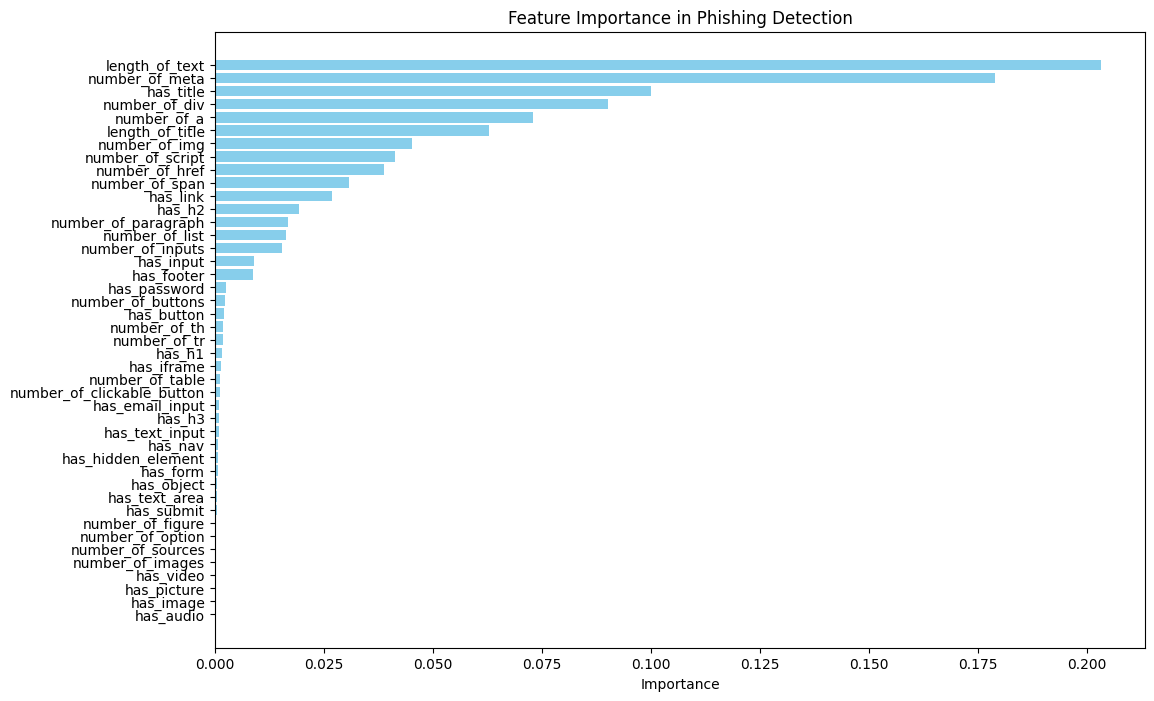

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset to get feature names
data_path = 'combined_data_randomized.csv'
model_path = 'phishing_detection_model.joblib'

# Load the dataset
combined_data = pd.read_csv(data_path)
# Load the trained model
model = joblib.load(model_path)

# Get feature names (assuming the last column is the label)
feature_names = combined_data.columns[:-1]  # Exclude the label column

# Check if the model is a Random Forest or similar
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    print("Model is tree-based. Feature importances retrieved.")
elif hasattr(model, 'coef_'):
    importances = model.coef_[0]  # For models like Logistic Regression or SVM
    print("Model has coefficients. Coefficients retrieved.")
else:
    importances = None
    print("The model does not have feature importances or coefficients.")

# Check the lengths of feature names and importances
if importances is not None:
    len_features = len(feature_names)
    len_importances = len(importances)

    print(f"Number of features: {len_features}")
    print(f"Number of importances: {len_importances}")

    # Identify and print which feature is missing
    if len_features != len_importances:
        print("Identifying missing features...")
        if hasattr(model, 'feature_importances_'):
            # Show which features are missing
            missing_features = feature_names[len_importances:]  # Features that are not accounted for in importances
            print("The following features are missing in importances:")
            for feature in missing_features:
                print(f"- {feature}")

    # Create a DataFrame for visualization of available features
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # Use only available features
        'Importance': importances
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance in Phishing Detection')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
    plt.show()
else:
    print("No importances or coefficients available for visualization.")


------------x----------------------------x---------------x-----------

In [ ]:
# Step 1 import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


# Step 2 read the csv files and create pandas dataframes
legitimate_df = pd.read_csv("structured_data_legitimate.csv")
phishing_df = pd.read_csv("structured_data_phishing.csv")

In [ ]:
# Step 3 combine legitimate and phishing dataframes, and shuffle
df = pd.concat([legitimate_df, phishing_df], axis=0)

df = df.sample(frac=1)


# Step 4 remove'url' and remove duplicates, then we can create X and Y for the models, Supervised Learning
df = df.drop('URL', axis=1)

df = df.drop_duplicates()

X = df.drop('label', axis=1)
Y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Step 5: Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Step 6: Create and store models in a dictionary for easy iteration
models = {
    'Support Vector Machine': svm.LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=60),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(alpha=1),
    'KNeighbors': KNeighborsClassifier()
}

# Step 7-10: Train each model, make predictions, and calculate metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Create confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predictions).ravel()

    # Calculate accuracy, precision, and recall
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    # Print results
    print(f"Model: {model_name}")
    print("Accuracy --> ", accuracy)
    print("Precision --> ", precision)
    print("Recall --> ", recall)
    print("\n" + "="*30 + "\n")


Model: Support Vector Machine
Accuracy -->  0.9730986383261375
Precision -->  0
Recall -->  0.0


Model: Random Forest
Accuracy -->  0.9754234473596811
Precision -->  0.7058823529411765
Recall -->  0.14814814814814814


Model: Decision Tree
Accuracy -->  0.9634672866157423
Precision -->  0.3116883116883117
Recall -->  0.2962962962962963




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy -->  0.9740949850547991
Precision -->  0.5714285714285714
Recall -->  0.14814814814814814


Model: Gaussian Naive Bayes
Accuracy -->  0.5161076054466954
Precision -->  0.048556430446194225
Recall -->  0.9135802469135802


Model: Neural Network
Accuracy -->  0.9730986383261375
Precision -->  0
Recall -->  0.0


Model: KNeighbors
Accuracy -->  0.9740949850547991
Precision -->  0.6666666666666666
Recall -->  0.07407407407407407




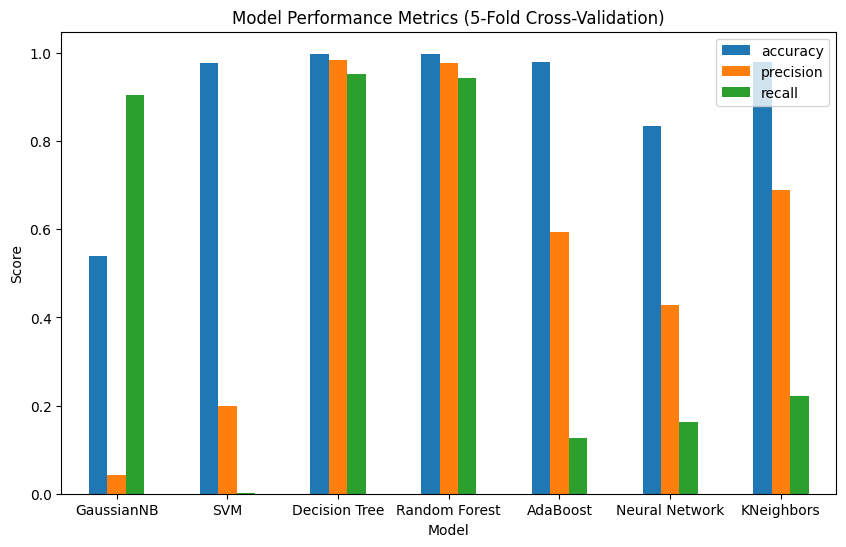

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 5: Split data into train and test sets for K-fold cross-validation
K = 5
total = X.shape[0]
index = int(total / K)

# Creating train and test splits for each fold
X_train_list, X_test_list = [], []
Y_train_list, Y_test_list = [], []

for i in range(K):
    start, end = i * index, (i + 1) * index
    X_test_list.append(X.iloc[start:end])
    Y_test_list.append(Y.iloc[start:end])
    X_train_list.append(X.iloc[np.r_[:start, end:]])
    Y_train_list.append(Y.iloc[np.r_[:start, end:]])

# Define a function to calculate accuracy, precision, and recall, handling division by zero
def calculate_measures(TN, TP, FN, FP):
    model_accuracy = (TP + TN) / (TP + TN + FN + FP)
    model_precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    model_recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    return model_accuracy, model_precision, model_recall

# Initialize lists to store results for each model
rf_accuracy_list, rf_precision_list, rf_recall_list = [], [], []
dt_accuracy_list, dt_precision_list, dt_recall_list = [], [], []
ab_accuracy_list, ab_precision_list, ab_recall_list = [], [], []
svm_accuracy_list, svm_precision_list, svm_recall_list = [], [], []
nb_accuracy_list, nb_precision_list, nb_recall_list = [], [], []
nn_accuracy_list, nn_precision_list, nn_recall_list = [], [], []
kn_accuracy_list, kn_precision_list, kn_recall_list = [], [], []

# Initialize models
rf_model = RandomForestClassifier(n_estimators=60)
dt_model = tree.DecisionTreeClassifier()
ab_model = AdaBoostClassifier(algorithm="SAMME")  # Use SAMME to avoid future warnings
svm_model = svm.LinearSVC()
nb_model = GaussianNB()
nn_model = MLPClassifier(alpha=1)
kn_model = KNeighborsClassifier()

# Perform K-fold cross-validation
for i in range(K):
    # ----- RANDOM FOREST ----- #
    rf_model.fit(X_train_list[i], Y_train_list[i])
    rf_predictions = rf_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=rf_predictions).ravel()
    rf_accuracy, rf_precision, rf_recall = calculate_measures(tn, tp, fn, fp)
    rf_accuracy_list.append(rf_accuracy)
    rf_precision_list.append(rf_precision)
    rf_recall_list.append(rf_recall)

    # ----- DECISION TREE ----- #
    dt_model.fit(X_train_list[i], Y_train_list[i])
    dt_predictions = dt_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=dt_predictions).ravel()
    dt_accuracy, dt_precision, dt_recall = calculate_measures(tn, tp, fn, fp)
    dt_accuracy_list.append(dt_accuracy)
    dt_precision_list.append(dt_precision)
    dt_recall_list.append(dt_recall)

    # ----- SUPPORT VECTOR MACHINE ----- #
    svm_model.fit(X_train_list[i], Y_train_list[i])
    svm_predictions = svm_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=svm_predictions).ravel()
    svm_accuracy, svm_precision, svm_recall = calculate_measures(tn, tp, fn, fp)
    svm_accuracy_list.append(svm_accuracy)
    svm_precision_list.append(svm_precision)
    svm_recall_list.append(svm_recall)

    # ----- ADABOOST ----- #
    ab_model.fit(X_train_list[i], Y_train_list[i])
    ab_predictions = ab_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=ab_predictions).ravel()
    ab_accuracy, ab_precision, ab_recall = calculate_measures(tn, tp, fn, fp)
    ab_accuracy_list.append(ab_accuracy)
    ab_precision_list.append(ab_precision)
    ab_recall_list.append(ab_recall)

    # ----- GAUSSIAN NAIVE BAYES ----- #
    nb_model.fit(X_train_list[i], Y_train_list[i])
    nb_predictions = nb_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=nb_predictions).ravel()
    nb_accuracy, nb_precision, nb_recall = calculate_measures(tn, tp, fn, fp)
    nb_accuracy_list.append(nb_accuracy)
    nb_precision_list.append(nb_precision)
    nb_recall_list.append(nb_recall)

    # ----- NEURAL NETWORK ----- #
    nn_model.fit(X_train_list[i], Y_train_list[i])
    nn_predictions = nn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=nn_predictions).ravel()
    nn_accuracy, nn_precision, nn_recall = calculate_measures(tn, tp, fn, fp)
    nn_accuracy_list.append(nn_accuracy)
    nn_precision_list.append(nn_precision)
    nn_recall_list.append(nn_recall)

    # ----- K-NEIGHBOURS CLASSIFIER ----- #
    kn_model.fit(X_train_list[i], Y_train_list[i])
    kn_predictions = kn_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=kn_predictions).ravel()
    kn_accuracy, kn_precision, kn_recall = calculate_measures(tn, tp, fn, fp)
    kn_accuracy_list.append(kn_accuracy)
    kn_precision_list.append(kn_precision)
    kn_recall_list.append(kn_recall)

# Calculate and display average metrics for each model
metrics = {
    'accuracy': [
        sum(nb_accuracy_list) / K, sum(svm_accuracy_list) / K,
        sum(dt_accuracy_list) / K, sum(rf_accuracy_list) / K,
        sum(ab_accuracy_list) / K, sum(nn_accuracy_list) / K,
        sum(kn_accuracy_list) / K
    ],
    'precision': [
        sum(nb_precision_list) / K, sum(svm_precision_list) / K,
        sum(dt_precision_list) / K, sum(rf_precision_list) / K,
        sum(ab_precision_list) / K, sum(nn_precision_list) / K,
        sum(kn_precision_list) / K
    ],
    'recall': [
        sum(nb_recall_list) / K, sum(svm_recall_list) / K,
        sum(dt_recall_list) / K, sum(rf_recall_list) / K,
        sum(ab_recall_list) / K, sum(nn_recall_list) / K,
        sum(kn_recall_list) / K
    ]
}

index = ['GaussianNB', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Neural Network', 'KNeighbors']
df_results = pd.DataFrame(data=metrics, index=index)

# Visualize the results
ax = df_results.plot.bar(rot=0, figsize=(10, 6), title="Model Performance Metrics (5-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()
